In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
import os
import zipfile

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!unzip -l "/content/drive/MyDrive/COVID-19_Chest_X_Rays.zip" | head -n 50


unzip:  cannot find or open /content/drive/MyDrive/COVID-19_Chest_X_Rays.zip, /content/drive/MyDrive/COVID-19_Chest_X_Rays.zip.zip or /content/drive/MyDrive/COVID-19_Chest_X_Rays.zip.ZIP.


In [16]:
base_dir = '/content/COVID_19_Chest_X_Rays/covid_update'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

# Checking actual subfolders
print("Train folder contents:")
print(os.listdir(train_dir))
print("Test folder contents:")
print(os.listdir(validation_dir))


Train folder contents:
['covid', 'non_covid']
Test folder contents:
['covid', 'non_covid']


In [17]:
train_covid_dir = os.path.join(train_dir, 'covid')
train_non_covid_dir = os.path.join(train_dir, 'non_covid')
test_covid_dir = os.path.join(test_dir, 'covid')
test_non_covid_dir = os.path.join(test_dir, 'non_covid')

In [18]:
zip_path = '/content/drive/MyDrive/COVID_19_Chest_X_Rays.zip'
extract_dir = '/content/COVID_19_Chest_X_Rays'

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)


In [24]:
base_dir = '/content/COVID_19_Chest_X_Rays/covid_update'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

train_covid_dir = os.path.join(train_dir, 'covid')
train_normal_dir = os.path.join(train_dir, 'non_covid')

test_covid_dir = os.path.join(test_dir, 'covid')
test_normal_dir = os.path.join(test_dir, 'non_covid')

In [25]:
num_covid_tr = len(os.listdir(train_covid_dir))
num_normal_tr = len(os.listdir(train_non_covid_dir))

num_covid_ts = len(os.listdir(test_covid_dir))
num_normal_ts = len(os.listdir(test_non_covid_dir))

total_train = num_covid_tr + num_normal_tr
total_test = num_covid_ts + num_normal_ts



In [77]:
print('total training covid images:', num_covid_tr)
print('total training normal images:', num_normal_tr)

print('total validation covid images:', num_covid_ts)
print('total validation normal images:', num_normal_ts)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_test)

total training covid images: 250
total training normal images: 203
total validation covid images: 100
total validation normal images: 119
--
Total training images: 453
Total validation images: 219


## **Visualize dataset distribution**

/tmp/ipython-input-1847797666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='pastel')


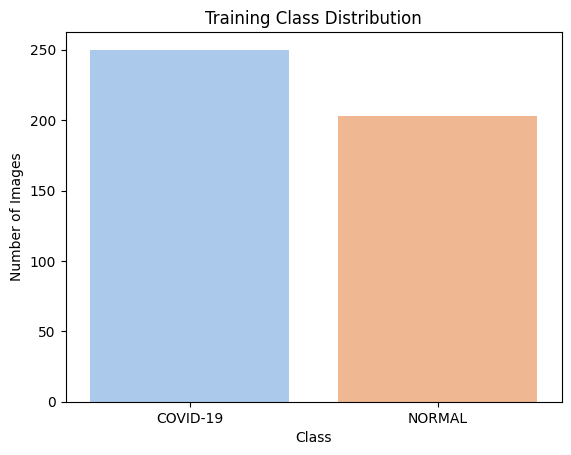

In [26]:
labels = ['COVID-19'] * num_covid_tr + ['NORMAL'] * num_normal_tr
sns.countplot(x=labels, palette='pastel')
plt.title("Training Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

/tmp/ipython-input-1827096695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='pastel')


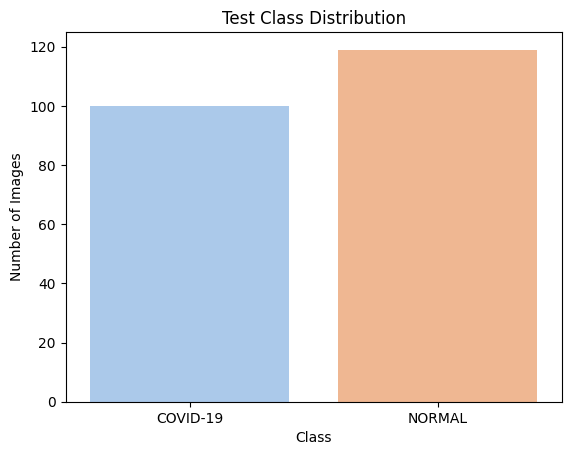

In [27]:
labels = ['COVID-19'] * num_covid_ts + ['NORMAL'] * num_normal_ts
sns.countplot(x=labels, palette='pastel')
plt.title("Test Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

/tmp/ipython-input-3511554193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=genders, palette='pastel')


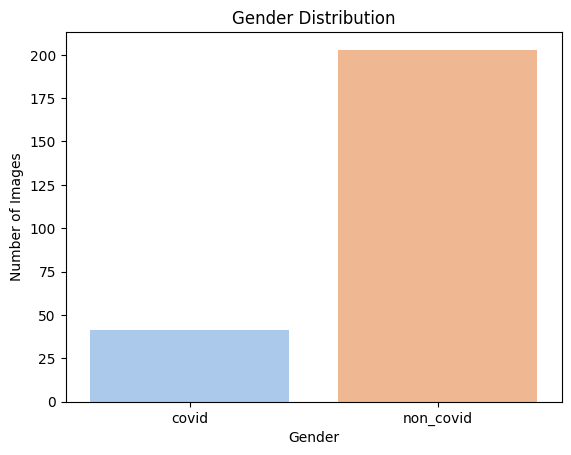

In [42]:
data_path = '/content/COVID_19_Chest_X_Rays/covid_update/Train'

genders = []
for gender_folder in os.listdir(data_path):
    full_path = os.path.join(data_path, gender_folder)
    if os.path.isdir(full_path):
        image_count = len([img for img in os.listdir(full_path) if img.endswith(('.jpg', '.png'))])
        genders.extend([gender_folder] * image_count)

sns.countplot(x=genders, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Images")
plt.show()


In [29]:
# model parameters

Batch_Size = 16
Image_Size = 500

In [30]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      )

train_data_gen = image_gen_train.flow_from_directory(batch_size=Batch_Size,
                                                     directory=train_dir,
                                                     color_mode = 'grayscale',
                                                     target_size=(Image_Size,Image_Size),
                                                     class_mode='binary')

Found 453 images belonging to 2 classes.


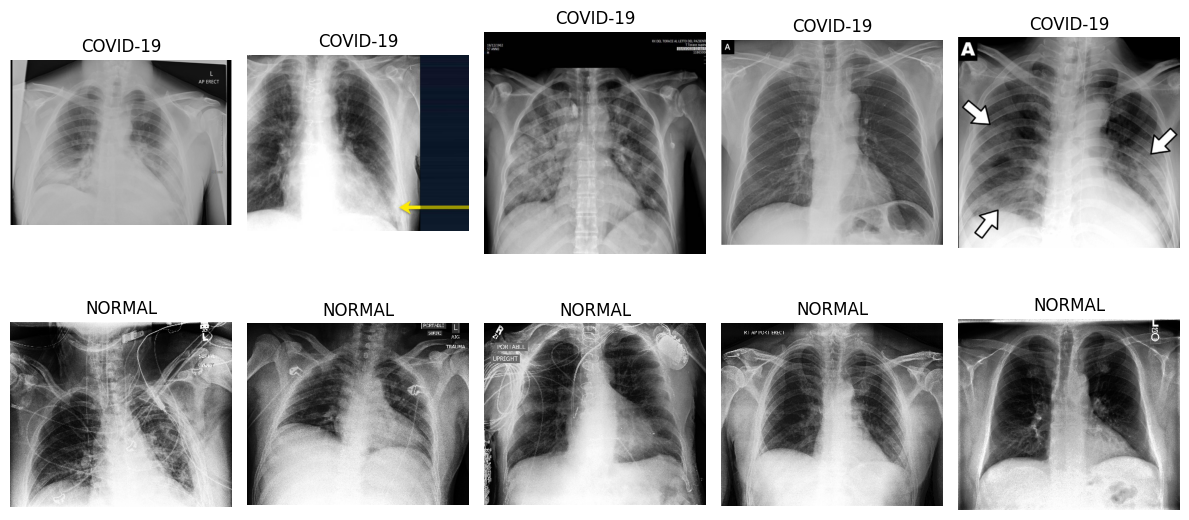

In [31]:
# to visualize the data

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(plt.imread(os.path.join(train_covid_dir, os.listdir(train_covid_dir)[i])), cmap='gray')
    plt.title("COVID-19")
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(plt.imread(os.path.join(train_non_covid_dir, os.listdir(train_non_covid_dir)[i])), cmap='gray')
    plt.title("NORMAL")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [32]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=Batch_Size,
                                                 directory=validation_dir,
                                                 color_mode = 'grayscale',
                                                 shuffle=False,
                                                 target_size=(Image_Size, Image_Size),
                                                 class_mode='binary')

Found 219 images belonging to 2 classes.


In [33]:
# creating the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(500, 500, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),


    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,076,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,387,554 (43.44 MB)

 Trainable params: 11,387,554 (43.44 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
epochs= 13
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(Batch_Size))),
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_test / float(Batch_Size)))
)

Epoch 1/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 247s 8s/step - accuracy: 0.5051 - loss: 0.7060 - val_accuracy: 0.4566 - val_loss: 0.7234
Epoch 2/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 281s 9s/step - accuracy: 0.6117 - loss: 0.6534 - val_accuracy: 0.5297 - val_loss: 0.6237
Epoch 3/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 255s 9s/step - accuracy: 0.7327 - loss: 0.4883 - val_accuracy: 0.7717 - val_loss: 0.5822
Epoch 4/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 248s 9s/step - accuracy: 0.8733 - loss: 0.3660 - val_accuracy: 0.8356 - val_loss: 0.3497
Epoch 5/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 276s 9s/step - accuracy: 0.8997 - loss: 0.2924 - val_accuracy: 0.8676 - val_loss: 0.3143
Epoch 6/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 320s 9s/step - accuracy: 0.9471 - loss: 0.1487 - val_accuracy: 0.9132 - val_loss: 0.2298
Epoch 7/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 254s 9s/step - accuracy: 0.9422 - loss: 0.1458 - val_accuracy: 0.9132 - val_loss: 0.3823
Epoch 8/13
29/29 ━━━━━━━━━━━━━━━━━━━━ 243s 8s/step - accuracy: 0.9130 - loss: 0.2398 - val_accuracy: 0.8265 - v

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 498, 498, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 249, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 247, 247, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 123, 123, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 121, 121, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    11,076,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,162,664 (130.32 MB)

 Trainable params: 11,387,554 (43.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,775,110 (86.88 MB)

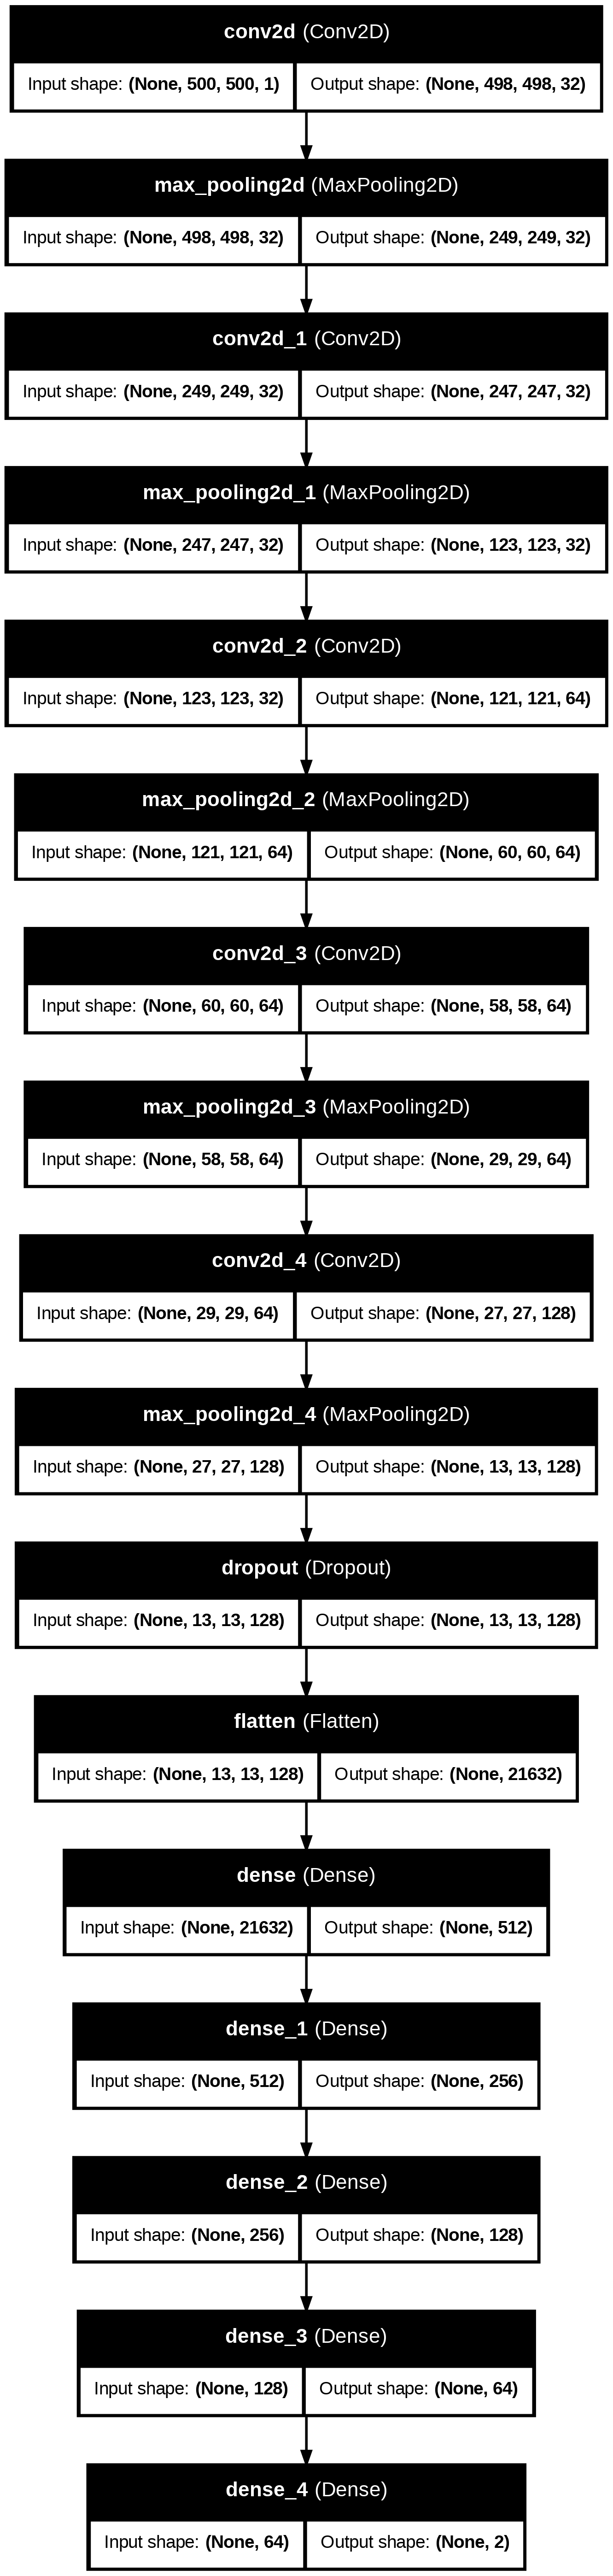

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

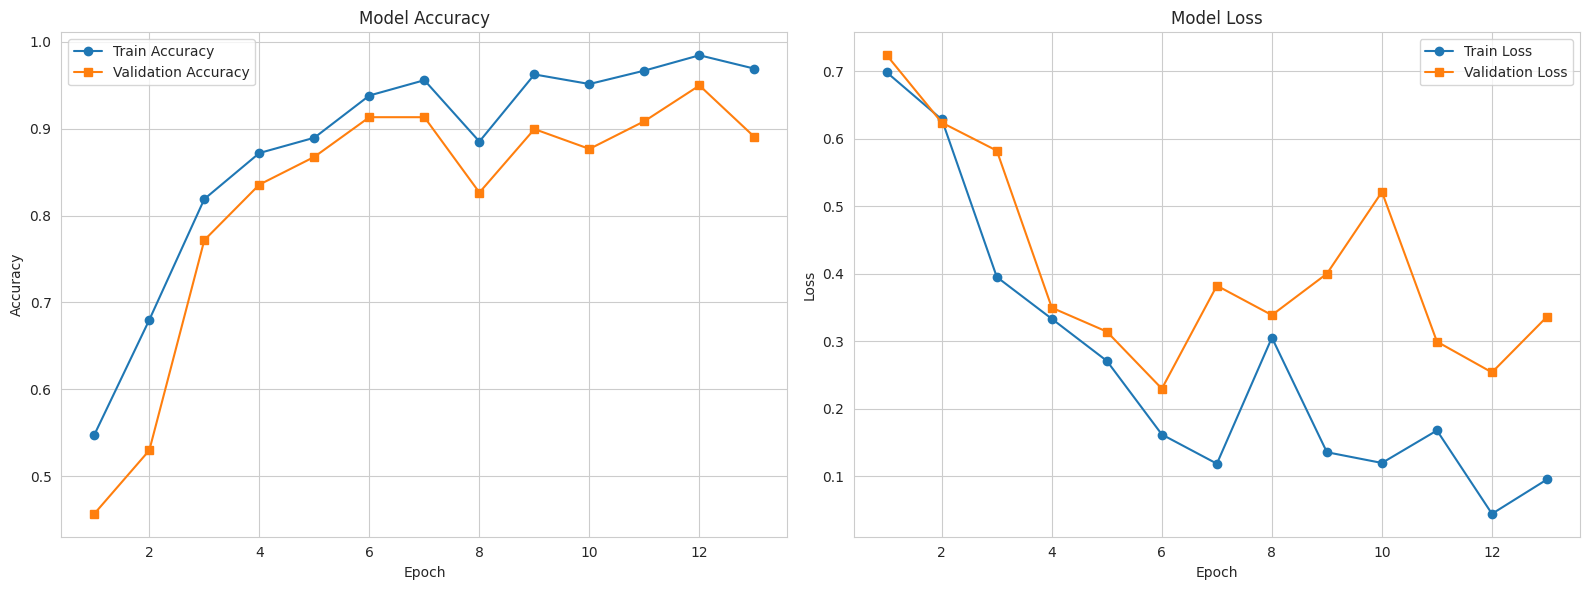

In [49]:
# for better visuals
sns.set_style("whitegrid")

# Extracting training history
history_dict = history.history
epochs_range = range(1, len(history_dict['accuracy']) + 1)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Accuracy
axes[0].plot(epochs_range, history_dict['accuracy'], label='Train Accuracy', marker='o')
axes[0].plot(epochs_range, history_dict['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot Loss
axes[1].plot(epochs_range, history_dict['loss'], label='Train Loss', marker='o')
axes[1].plot(epochs_range, history_dict['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)


plt.tight_layout()
plt.show()


In [92]:

train_accuracy = model.evaluate(train_data_gen)
print('The training accuracy is :',train_accuracy[1]*100, '%')

29/29 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9393 - loss: 0.1579
The training accuracy is : 94.0397322177887 %


In [48]:
test_accuracy = model.evaluate(val_data_gen)
print('The testing accuracy is :',test_accuracy[1]*100, '%')

14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8244 - loss: 0.5531
The testing accuracy is : 89.04109597206116 %
